In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as scisig
import scipy.io as sio
import scipy.optimize as opt

In [2]:
def load_data(filepath, channels):
    data = sio.loadmat(filepath)
    tts = np.zeros((len(channels), data['Length'][0][0]))
    for n, i in enumerate(channels):
        tt = np.transpose(data[i])[0]
        tts[n] = tt
    return tts, data['Tinterval'][0][0]

def linewidth(f, f0, A, y, c):
    return A/((f**2-f0**2)**2+(f*y)**2) + c

def make_PSDs(filepath, extensions, channels):
    PSDA = []
    PSDB = []
    for extension in extensions:
        tts, Tinterval = load_data(filepath+extension, channels)
        PSD0 = scisig.welch(tts[0], fs = int(1/Tinterval), nperseg = int(0.01/Tinterval))
        PSD1 = scisig.welch(tts[1], fs = int(1/Tinterval), nperseg = int(0.01/Tinterval))
        PSDA.append(PSD0)
        PSDB.append(PSD1)
    PSDA = np.array(PSDA)
    PSDB = np.array(PSDB)
    return PSDA, PSDB

Pumping down - 20230814

In [3]:
filepath = 'D:\\Experiment\\Cooling\\230814\\Pump Down\\tt ('
extensions = ['16).mat']
channels = ['A', 'B']

tt = []
for extension in extensions:
        tts, Tinterval = load_data(filepath+extension, channels)
        tt.append(tts)
        
PSDA, PSDB = make_PSDs(filepath, extensions, channels)

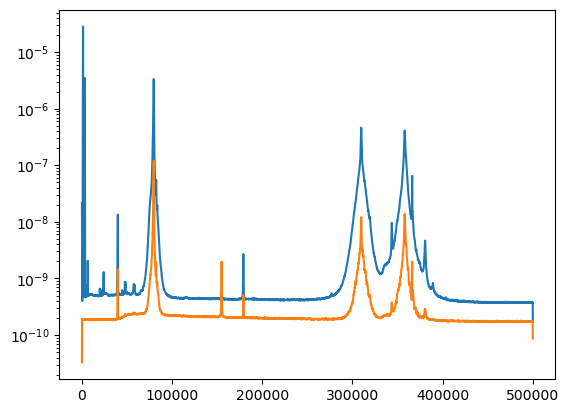

In [13]:
plt.plot(PSDA[0][0], PSDA[0][1])
plt.plot(PSDB[0][0], PSDB[0][1])
plt.yscale('log')

Still looks OK at this point, altough the y mode is not cooled very well

c:\Users\microspheres\anaconda3\envs\microspheres\Lib\site-packages\scipy\signal\_signaltools.py:3530: RuntimeWarning: invalid value encountered in subtract
  ret = data - np.mean(data, axis, keepdims=True)
c:\Users\microspheres\anaconda3\envs\microspheres\Lib\site-packages\scipy\signal\_spectral_py.py:1962: RuntimeWarning: invalid value encountered in multiply
  result = win * result


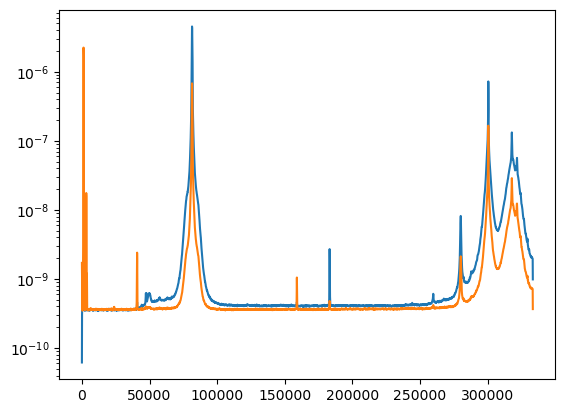

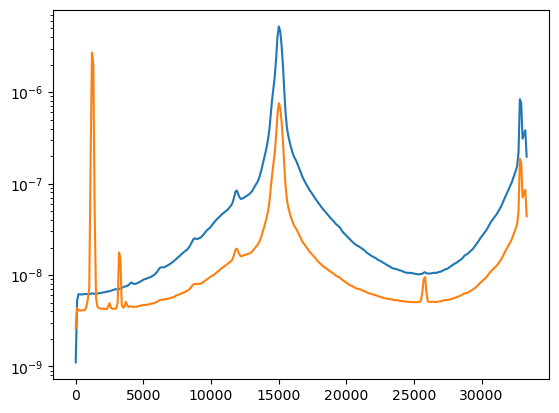

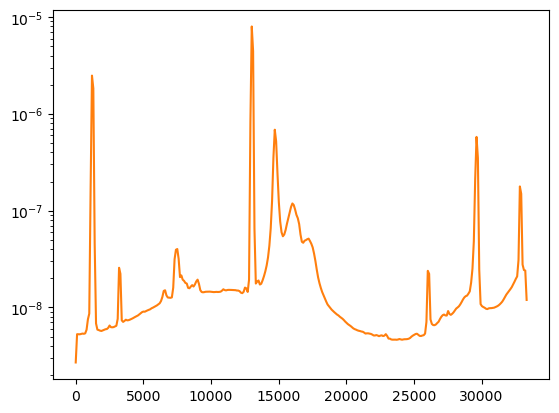

In [45]:
filepath = 'D:\\Experiment\\Cooling\\230815\\Pump Down\\tt ('
channels = ['A', 'B']

for i in range(100, 101):
    extensions = [f'{int(i)}).mat']
    PSDA, PSDB = make_PSDs(filepath, extensions, channels)

    plt.plot(PSDA[0][0], PSDA[0][1])
    plt.plot(PSDB[0][0], PSDB[0][1])
    plt.yscale('log')
plt.figure()
for i in range(108, 109):
    extensions = [f'{int(i)}).mat']
    PSDA, PSDB = make_PSDs(filepath, extensions, channels)

    plt.plot(PSDA[0][0], PSDA[0][1])
    plt.plot(PSDB[0][0], PSDB[0][1])
    plt.yscale('log')

plt.figure()
for i in range(121, 122):
    extensions = [f'{int(i)}).mat']
    PSDA, PSDB = make_PSDs(filepath, extensions, channels)

    plt.plot(PSDA[0][0], PSDA[0][1])
    plt.plot(PSDB[0][0], PSDB[0][1])
    plt.yscale('log')

Then we completely lost the x detection - the channel is saturated for some reason

69


c:\Users\microspheres\anaconda3\envs\microspheres\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
c:\Users\microspheres\anaconda3\envs\microspheres\Lib\site-packages\scipy\signal\_signaltools.py:3530: RuntimeWarning: invalid value encountered in subtract
  ret = data - np.mean(data, axis, keepdims=True)
c:\Users\microspheres\anaconda3\envs\microspheres\Lib\site-packages\scipy\signal\_spectral_py.py:1962: RuntimeWarning: invalid value encountered in multiply
  result = win * result


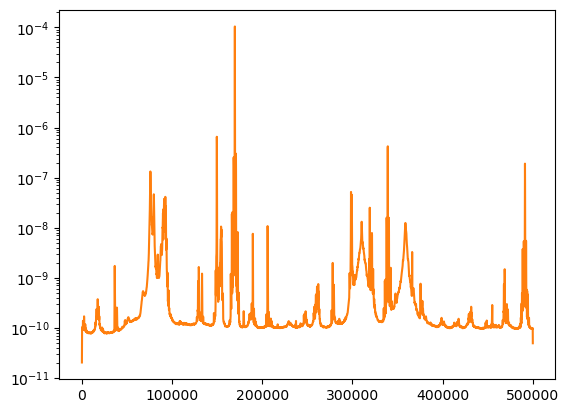

In [5]:
for i in range(69, 70):
    print(i)
    extensions = [f'{int(i)}).mat']
    PSDA, PSDB = make_PSDs(filepath, extensions, channels)

    plt.plot(PSDA[0][0], PSDA[0][1])
    plt.plot(PSDB[0][0], PSDB[0][1])
    plt.yscale('log')

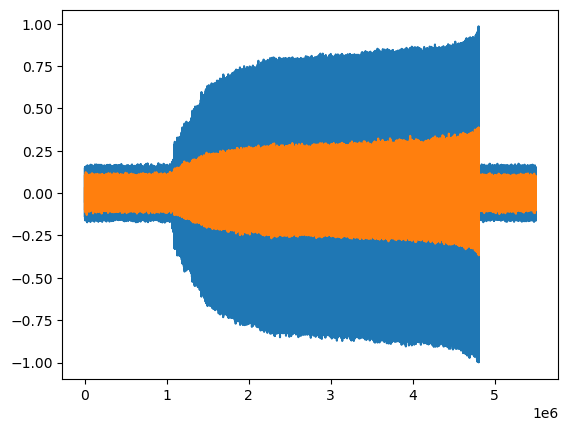

In [82]:
filepath = 'D:\\Experiment\\Cooling\\230815\\Pump Down\\tt ('
channels = ['A', 'B']
extension = '121).mat'

tts, Tinterval = load_data(filepath + extension, channels)

import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

plt.plot(tts[0][740*10**4:1290*10**4])
plt.plot(tts[1][740*10**4:1290*10**4])


In [63]:
50000*1*10**(-5)

0.5

Text(0, 0.5, 'Signal (V)')

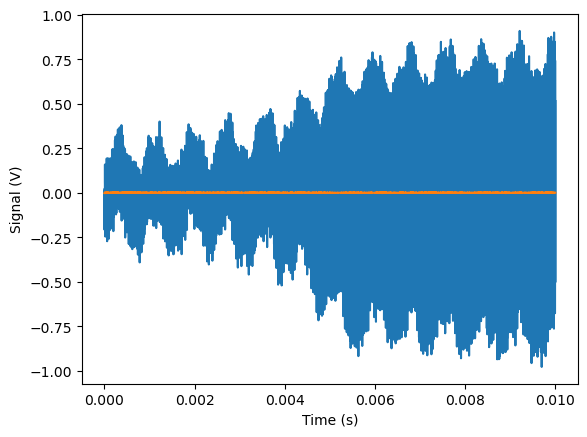

In [46]:
idx = int(3.001e7)
length = 10000

plt.plot(Tinterval * np.arange(length), tts[0][idx:idx+length])
plt.plot(Tinterval * np.arange(length), tts[1][idx:idx+length])

plt.xlabel('Time (s)')
plt.ylabel('Signal (V)')


Text(0, 0.5, 'Signal (V)')

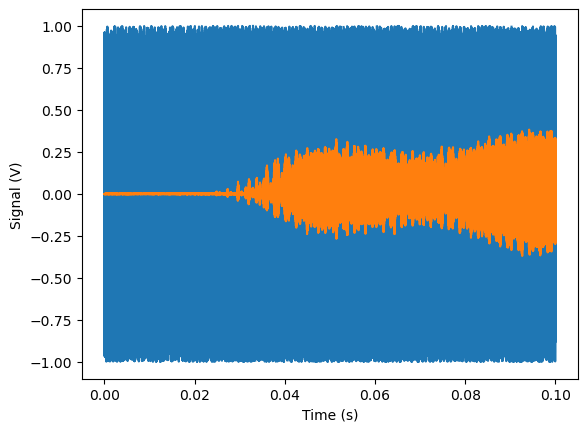

In [45]:
idx = int(3.01e7)
length = 100000

plt.plot(Tinterval * np.arange(length), tts[0][idx:idx+length])
plt.plot(Tinterval * np.arange(length), tts[1][idx:idx+length])

plt.xlabel('Time (s)')
plt.ylabel('Signal (V)')


Also worth noticing that the detection seems to be unstable at times (why aren't we seeing the y-motion?)

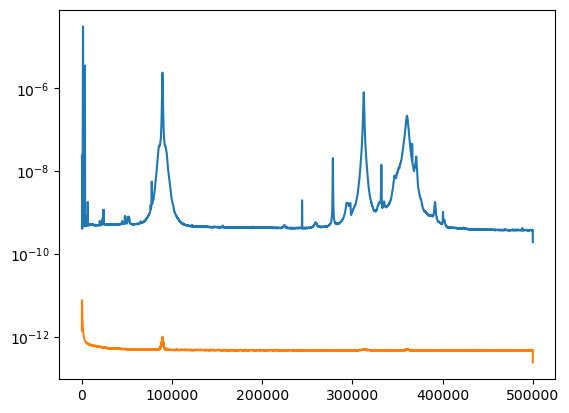

In [36]:
filepath = 'D:\\Experiment\\Cooling\\230814\\Pump Down\\tt ('
channels = ['A', 'B']

for i in range(88, 89):
    extensions = [f'{int(i)}).mat']
    PSDA, PSDB = make_PSDs(filepath, extensions, channels)

    plt.plot(PSDA[0][0], PSDA[0][1])
    plt.plot(PSDB[0][0], PSDB[0][1])
    plt.yscale('log')
